In [1]:
%pylab inline
from nbodykit.lab import *
from nbodykit import style, setup_logging

Populating the interactive namespace from numpy and matplotlib


In [2]:
redshift = 0.55
cosmo = cosmology.Planck15
Plin = cosmology.LinearPower(cosmo, redshift, transfer='EisensteinHu')
b1 = 2.0

cat = LogNormalCatalog(Plin=Plin, nbar=3e-4, BoxSize=1380., Nmesh=256, bias=b1, seed=42)

In [3]:
# add RSD
line_of_sight = [0,0,1]
cat['RSDPosition'] = cat['Position'] + cat['VelocityOffset'] * line_of_sight

In [4]:
# convert to a MeshSource, using TSC interpolation on 256^3 mesh
mesh = cat.to_mesh(resampler='tsc', Nmesh=256, compensated=True, position='RSDPosition')

In [5]:
# compute the 2D power
r = FFTPower(mesh, mode='2d', dk=0.005, kmin=0.01, Nmu=5, los=[0,0,1])
Pkmu = r.power
print(Pkmu)

<BinnedStatistic: dims: (k: 115, mu: 5), variables: ('k', 'mu', 'power', 'modes')>


In [6]:
print(Pkmu.coords)

{'k': array([0.0125, 0.0175, 0.0225, 0.0275, 0.0325, 0.0375, 0.0425, 0.0475,
       0.0525, 0.0575, 0.0625, 0.0675, 0.0725, 0.0775, 0.0825, 0.0875,
       0.0925, 0.0975, 0.1025, 0.1075, 0.1125, 0.1175, 0.1225, 0.1275,
       0.1325, 0.1375, 0.1425, 0.1475, 0.1525, 0.1575, 0.1625, 0.1675,
       0.1725, 0.1775, 0.1825, 0.1875, 0.1925, 0.1975, 0.2025, 0.2075,
       0.2125, 0.2175, 0.2225, 0.2275, 0.2325, 0.2375, 0.2425, 0.2475,
       0.2525, 0.2575, 0.2625, 0.2675, 0.2725, 0.2775, 0.2825, 0.2875,
       0.2925, 0.2975, 0.3025, 0.3075, 0.3125, 0.3175, 0.3225, 0.3275,
       0.3325, 0.3375, 0.3425, 0.3475, 0.3525, 0.3575, 0.3625, 0.3675,
       0.3725, 0.3775, 0.3825, 0.3875, 0.3925, 0.3975, 0.4025, 0.4075,
       0.4125, 0.4175, 0.4225, 0.4275, 0.4325, 0.4375, 0.4425, 0.4475,
       0.4525, 0.4575, 0.4625, 0.4675, 0.4725, 0.4775, 0.4825, 0.4875,
       0.4925, 0.4975, 0.5025, 0.5075, 0.5125, 0.5175, 0.5225, 0.5275,
       0.5325, 0.5375, 0.5425, 0.5475, 0.5525, 0.5575, 0.5625, 0.5675,


(0.01, 0.6)

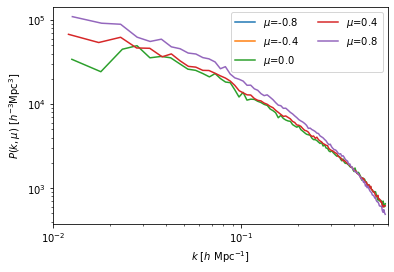

In [10]:
# plot each mu bin
for i in range(Pkmu.shape[1]):
    Pk = Pkmu[:,i] # select the ith mu bin
    label = r'$\mu$=%.1f' % (Pkmu.coords['mu'][i])
    plt.loglog(Pk['k'], Pk['power'].real - Pk.attrs['shotnoise'], label=label)

# format the axes
plt.legend(loc=0, ncol=2)
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k, \mu)$ [$h^{-3}\mathrm{Mpc}^3$]")
plt.xlim(0.01, 0.6)